In [1]:
path_lwf = '/home/karokaro/research-repositories/FACIL/results/cifar100_lwf_final_cifar100'

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwf) if isfile(join(path_lwf, f))]
onlyfiles

['args-2025-01-23-04-21.txt',
 'stderr-2025-01-23-03-59.txt',
 'stderr-2025-01-23-03-36.txt',
 'stderr-2025-01-23-04-37.txt',
 'stdout-2025-01-23-03-59.txt',
 'raw_log-2025-01-23-04-21.txt',
 'stdout-2025-01-23-03-13.txt',
 'stderr-2025-01-23-05-29.txt',
 'raw_log-2025-01-23-03-13.txt',
 'raw_log-2025-01-23-03-59.txt',
 'stdout-2025-01-23-02-47.txt',
 'args-2025-01-23-03-36.txt',
 'args-2025-01-23-03-13.txt',
 'stderr-2025-01-23-04-21.txt',
 'raw_log-2025-01-23-02-47.txt',
 'raw_log-2025-01-23-04-37.txt',
 'raw_log-2025-01-23-05-13.txt',
 'args-2025-01-23-04-37.txt',
 'raw_log-2025-01-23-03-36.txt',
 'stderr-2025-01-23-03-13.txt',
 'stdout-2025-01-23-04-21.txt',
 'raw_log-2025-01-23-04-55.txt',
 'stdout-2025-01-23-05-13.txt',
 'stderr-2025-01-23-04-55.txt',
 'stdout-2025-01-23-03-36.txt',
 'raw_log-2025-01-23-05-29.txt',
 'stdout-2025-01-23-04-55.txt',
 'args-2025-01-23-05-29.txt',
 'stdout-2025-01-23-05-29.txt',
 'stderr-2025-01-23-05-13.txt',
 'args-2025-01-23-05-13.txt',
 'stdout-20

In [3]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [4]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwf, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [5]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwf, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [6]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [9]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [7]:
import pandas as pd
import numpy as np
from itertools import chain
data = pd.DataFrame({'Approach': list(chain.from_iterable([['LWF' for i in range(10)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(10)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(10)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(10)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_39409/1207693049.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

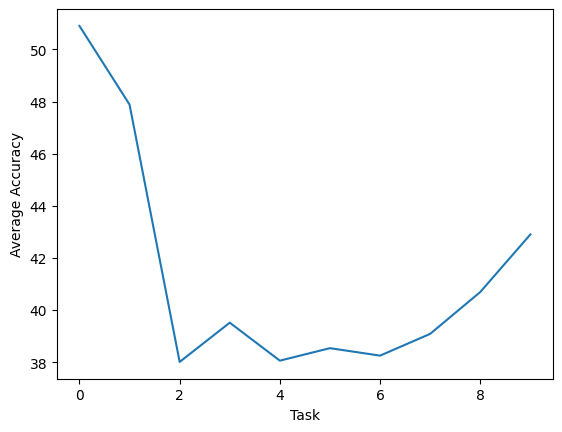

In [8]:
import seaborn as sns
sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)

In [9]:
data.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWF      0                50.90                 NaN
         1                47.88                2.80
         2                38.01               12.10
         3                39.52                8.94
         4                38.06               11.28
         5                38.54               11.08
         6                38.25               11.73
         7                39.09               10.91
         8                40.69                9.84
         9                42.90                8.35

In [10]:
path_ewc = '/home/karokaro/research-repositories/FACIL/results/cifar100_ewc_final_cifar100'

In [ ]:
onlyfiles = [f for f in listdir(path_ewc) if isfile(join(path_ewc, f))]
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [12]:
import json
arg_dict = {}
for file in args:
    with open(join(path_ewc, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [13]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_ewc, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [14]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [9]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [15]:
data_ewc = pd.DataFrame({'Approach': list(chain.from_iterable([['EWC' for i in range(10)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(10)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(10)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(10)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

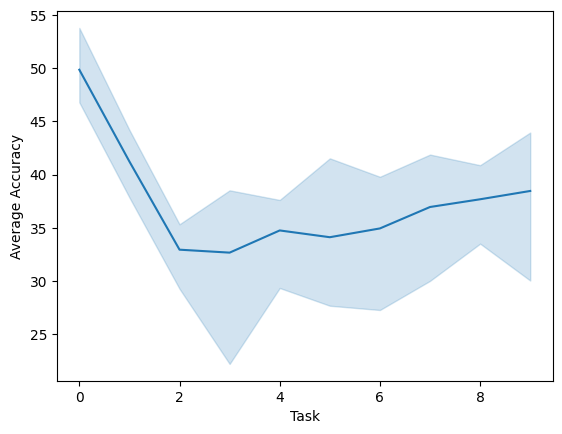

In [16]:
sns.lineplot( data_ewc,  x='Task', y='Average Accuracy')

In [17]:
data_ewc.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
EWC      0                49.87                 NaN
         1                41.23               14.63
         2                32.94               18.20
         3                32.67               15.37
         4                34.75               12.98
         5                34.12               13.53
         6                34.94               13.27
         7                36.96               11.36
         8                37.69               11.15
         9                38.47               11.13

In [18]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/cifar100_lwm_final_cifar100'

In [19]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['args-2025-01-23-09-24.txt',
 'stderr-2025-01-23-06-17.txt',
 'stderr-2025-01-23-08-06.txt',
 'raw_log-2025-01-23-09-24.txt',
 'stderr-2025-01-23-07-14.txt',
 'stderr-2025-01-23-08-33.txt',
 'stderr-2025-01-23-09-02.txt',
 'stdout-2025-01-23-08-06.txt',
 'raw_log-2025-01-23-05-47.txt',
 'stdout-2025-01-23-07-41.txt',
 'raw_log-2025-01-23-08-33.txt',
 'stderr-2025-01-23-09-24.txt',
 'stderr-2025-01-23-05-47.txt',
 'stdout-2025-01-23-08-33.txt',
 'stdout-2025-01-23-07-14.txt',
 'stdout-2025-01-23-05-47.txt',
 'raw_log-2025-01-23-08-06.txt',
 'args-2025-01-23-06-17.txt',
 'raw_log-2025-01-23-07-41.txt',
 'stderr-2025-01-23-06-44.txt',
 'args-2025-01-23-07-14.txt',
 'raw_log-2025-01-23-09-02.txt',
 'stdout-2025-01-23-09-02.txt',
 'stdout-2025-01-23-06-44.txt',
 'args-2025-01-23-08-33.txt',
 'args-2025-01-23-08-06.txt',
 'args-2025-01-23-05-47.txt',
 'args-2025-01-23-09-02.txt',
 'raw_log-2025-01-23-07-14.txt',
 'raw_log-2025-01-23-06-17.txt',
 'raw_log-2025-01-23-06-44.txt',
 'args-2025-0

In [20]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [21]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [22]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [23]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [9]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [ ]:
import pandas as pd
import numpy as np
from itertools import chain
data_lwm = pd.DataFrame({'Approach': list(chain.from_iterable([['LWM' for i in range(10)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(10)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(10)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(10)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

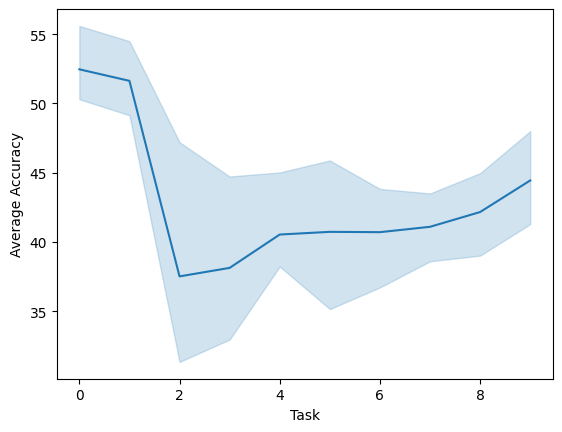

In [25]:
sns.lineplot( data_lwm,  x='Task', y='Average Accuracy')

In [26]:
data_lwm.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWM      0                52.47                 NaN
         1                51.63                0.70
         2                37.51               14.83
         3                38.12               12.31
         4                40.53               10.53
         5                40.73               11.15
         6                40.70               11.47
         7                41.09               11.29
         8                42.16               10.77
         9                44.44                9.36

In [27]:
path_icarl = '/home/karokaro/research-repositories/FACIL/results/cifar100_icarl_final_cifar'

In [28]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_icarl) if isfile(join(path_icarl, f))]
onlyfiles

['args-2025-01-14-13-33.txt',
 'args-2025-01-14-11-42.txt',
 'stderr-2025-01-14-13-50.txt',
 'raw_log-2025-01-14-11-16.txt',
 'stdout-2025-01-14-13-50.txt',
 'stderr-2025-01-14-12-02.txt',
 'args-2025-01-14-14-08.txt',
 'args-2025-01-14-12-58.txt',
 'args-2025-01-14-12-02.txt',
 'raw_log-2025-01-14-14-08.txt',
 'raw_log-2025-01-14-11-29.txt',
 'stdout-2025-01-14-13-33.txt',
 'args-2025-01-14-11-29.txt',
 'args-2025-01-14-11-16.txt',
 'raw_log-2025-01-14-13-33.txt',
 'stdout-2025-01-14-12-26.txt',
 'stderr-2025-01-14-11-42.txt',
 'stdout-2025-01-14-12-58.txt',
 'raw_log-2025-01-14-11-42.txt',
 'stderr-2025-01-14-14-08.txt',
 'raw_log-2025-01-14-12-26.txt',
 'stdout-2025-01-14-11-42.txt',
 'stderr-2025-01-14-12-58.txt',
 'raw_log-2025-01-14-13-50.txt',
 'args-2025-01-14-13-50.txt',
 'stderr-2025-01-14-12-26.txt',
 'stdout-2025-01-14-11-29.txt',
 'stdout-2025-01-14-12-02.txt',
 'raw_log-2025-01-14-12-02.txt',
 'stdout-2025-01-14-14-08.txt',
 'stderr-2025-01-14-11-16.txt',
 'stdout-2025-01

In [29]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [30]:
import json
arg_dict = {}
for file in args:
    with open(join(path_icarl, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [31]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_icarl, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [32]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [9]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [33]:
import pandas as pd
import numpy as np
from itertools import chain
data_icarl = pd.DataFrame({'Approach': list(chain.from_iterable([['iCaRL' for i in range(10)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(10)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(10)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(10)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [34]:
data_icarl.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
iCaRL    0                46.23                 NaN
         1                42.45                2.10
         2                36.94                5.70
         3                38.12                2.83
         4                39.96                1.80
         5                39.47                3.12
         6                40.46                2.70
         7                39.80                3.70
         8                40.34                3.00
         9                40.61                2.93

In [35]:
path_rere = '/home/karokaro/research-repositories/FACIL/results/cifar100_rere_lrp_final_cifar'

In [36]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_rere) if isfile(join(path_rere, f))]
onlyfiles

['raw_log-2025-01-09-02-42.txt',
 'args-2025-01-10-18-33.txt',
 'stderr-2025-01-08-19-37.txt',
 'raw_log-2025-01-10-02-42.txt',
 'args-2025-01-11-03-08.txt',
 'raw_log-2025-01-10-10-44.txt',
 'stdout-2025-01-08-11-47.txt',
 'stderr-2025-01-08-11-47.txt',
 'raw_log-2025-01-09-10-49.txt',
 'raw_log-2025-01-08-11-47.txt',
 'stdout-2025-01-09-02-42.txt',
 'stdout-2025-01-10-10-44.txt',
 'args-2025-01-09-02-42.txt',
 'stderr-2025-01-09-18-08.txt',
 'args-2025-01-10-02-42.txt',
 'raw_log-2025-01-11-03-08.txt',
 'stdout-2025-01-09-18-08.txt',
 'stdout-2025-01-10-18-33.txt',
 'args-2025-01-08-19-37.txt',
 'args-2025-01-09-10-49.txt',
 'stderr-2025-01-10-10-44.txt',
 'stdout-2025-01-09-10-49.txt',
 'stderr-2025-01-09-02-42.txt',
 'stderr-2025-01-11-03-08.txt',
 'stdout-2025-01-10-02-42.txt',
 'stderr-2025-01-09-10-49.txt',
 'raw_log-2025-01-10-18-33.txt',
 'raw_log-2025-01-08-19-37.txt',
 'stderr-2025-01-10-02-42.txt',
 'stderr-2025-01-10-18-33.txt',
 'raw_log-2025-01-09-18-08.txt',
 'args-2025

In [37]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [38]:
import json
arg_dict = {}
for file in args:
    with open(join(path_rere, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [39]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_rere, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [40]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [9]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [41]:
data_rere = pd.DataFrame({'Approach': list(chain.from_iterable([['ReReLRP' for i in range(10)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(10)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(10)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(10)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

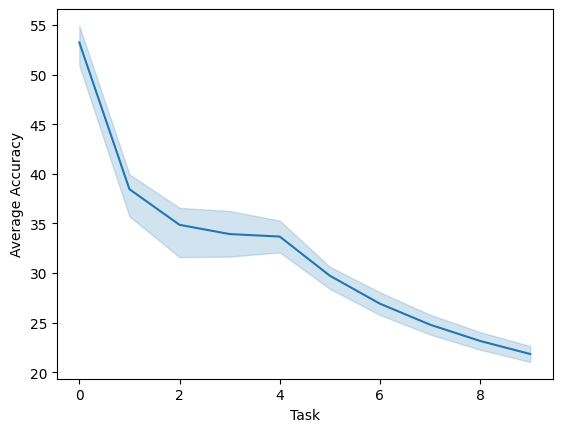

In [42]:
sns.lineplot( data_rere,  x='Task', y='Average Accuracy')

In [43]:
data_rere.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
ReReLRP  0                53.23                 NaN
         1                38.45               10.30
         2                34.86                5.15
         3                33.93                3.43
         4                33.67                2.58
         5                29.73                2.06
         6                26.91                1.72
         7                24.80                1.47
         8                23.15                1.29
         9                21.84                1.14

In [44]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/cifar100_joint_final_cifar'

In [45]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['stderr-2025-01-15-01-05.txt',
 'stderr-2025-01-15-00-02.txt',
 'stderr-2025-01-15-02-02.txt',
 'args-2025-01-15-03-20.txt',
 'stdout-2025-01-15-02-02.txt',
 'stderr-2025-01-15-00-34.txt',
 'raw_log-2025-01-15-01-05.txt',
 'stdout-2025-01-15-01-05.txt',
 'stdout-2025-01-14-23-33.txt',
 'stdout-2025-01-15-00-34.txt',
 'stdout-2025-01-15-02-27.txt',
 'args-2025-01-15-00-02.txt',
 'stderr-2025-01-14-23-33.txt',
 'args-2025-01-15-02-02.txt',
 'stdout-2025-01-15-02-53.txt',
 'raw_log-2025-01-15-00-34.txt',
 'raw_log-2025-01-15-01-34.txt',
 'raw_log-2025-01-15-00-02.txt',
 'stderr-2025-01-15-03-20.txt',
 'raw_log-2025-01-15-02-02.txt',
 'stderr-2025-01-15-02-27.txt',
 'raw_log-2025-01-14-23-33.txt',
 'raw_log-2025-01-15-02-53.txt',
 'raw_log-2025-01-15-02-27.txt',
 'args-2025-01-15-01-34.txt',
 'stderr-2025-01-15-02-53.txt',
 'raw_log-2025-01-15-03-20.txt',
 'args-2025-01-14-23-33.txt',
 'args-2025-01-15-00-34.txt',
 'stdout-2025-01-15-03-20.txt',
 'args-2025-01-15-02-53.txt',
 'stdout-2025

In [46]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [47]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [48]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [49]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [9]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [50]:
import pandas as pd
import numpy as np
from itertools import chain
data_joint = pd.DataFrame({'Approach': list(chain.from_iterable([['Joint' for i in range(10)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(10)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(10)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(10)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_39409/2585113533.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

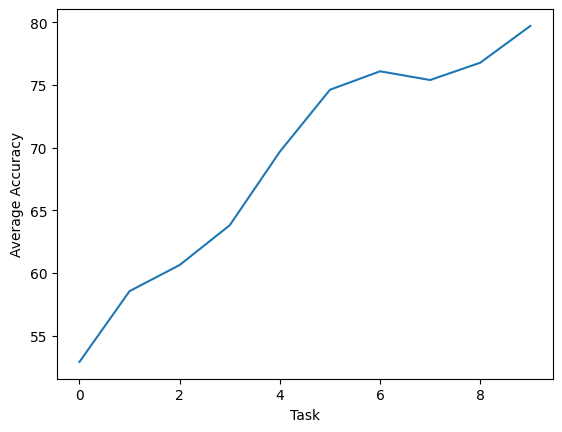

In [51]:
sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)

In [52]:
data_joint.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
Joint    0                52.90                 NaN
         1                58.55               -9.53
         2                60.63               -3.95
         3                63.81               -4.60
         4                69.68               -5.94
         5                74.62               -4.79
         6                76.10               -2.15
         7                75.40               -0.61
         8                76.78               -1.57
         9                79.72               -2.48

In [53]:
data_all = pd.concat([data, data_ewc, data_icarl, data_rere, data_joint, data_lwm], ignore_index=True)

/tmp/ipykernel_39409/2706145925.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)


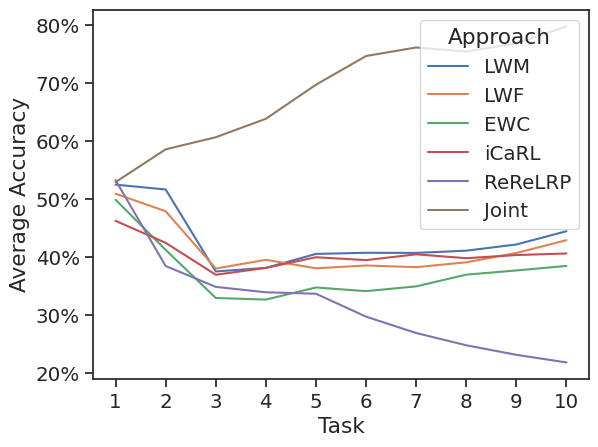

In [54]:
import matplotlib.pyplot as plt
hue_order = ["LWM", "LWF", "EWC", "iCaRL", "ReReLRP", "Joint"]
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)
g.set_xticks(range(10))
g.set_xticklabels([i+1 for i in range(10)])
import matplotlib.ticker as mtick
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("cifar100_taw.pdf", format='pdf', bbox_inches='tight')